Link para ver el video: https://www.youtube.com/watch?v=22G03X9BwjU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
class regresion_lineal: 
    def __init__(self,epoch, error_int, α ):
        
        #############################################
        ## Se carga la informacion en formato .npy ##
        #############################################   
        path = "C:\\Users\\Marcela Ambrosio\\OneDrive\\Documentos\\Galileo\\Ciencia de Datos en python\\Proyecto Final\\proyecto_data\\"
        filename = "proyecto_training_data.npy"
        self.data_array = np.load(path+filename)

        #####################################################        
        ## Se crean los dataset de entrenamiento y pruebas ##
        #####################################################
        self.entrenamiento_x, self.prueba_x, self.entrenamiento_y, self.prueba_y = train_test_split(self.data_array[:,2], self.data_array[:,0], test_size = 0.20, shuffle = False)
        
        ## Se divididen los valores de los arreglos ya que de lo contrario da error por desbordamiento.
        self.entrenamiento_x = np.reshape(self.entrenamiento_x, (-1, 1)) / 1000
        self.entrenamiento_y = np.reshape(self.entrenamiento_y, (-1, 1)) / 1000        
        
        self.prueba_x = np.reshape(self.prueba_x, (-1, 1)) / 1000
        self.prueba_y = np.reshape(self.prueba_y, (-1, 1)) / 1000

        ######################################################################
        ## Se ejecuta el analisis exploratorio para el set de entrenamiento ##
        ######################################################################
        print('Análisis Exploratorio Set de Entrenamiento')
        self.analisis_exploratorio(self.entrenamiento_x)
 
        #####################################
        ## Se grafican todas las variables ##
        #####################################
        self.graficaVariable(self.entrenamiento_x, self.entrenamiento_y, self.prueba_x, self.prueba_y)

        ##############################################
        ## Se calcula el coeficiente de correlacion ##
        ##############################################
        self.comparaVariables(self.entrenamiento_x, self.entrenamiento_y)
 
        #################################################       
        ## Se genera regresion                         ##
        #regresion(self, x, y, epoch, error_int, lrate)##
        #################################################
        
        error,betas,iteracion,gradient,b0,b1 = self.regresion(self.entrenamiento_x, self.entrenamiento_y, epoch, error_int, α)
        
        self.totalBeta = dict(zip(np.array(iteracion), np.array(betas)))
        self.totalError = dict(zip(np.array(iteracion), np.array(error)))
        self.totalGradiente = dict(zip(np.array(iteracion), np.array(gradient)))


        self.errorintime(self.totalError)
        self.evolucionmodelo(betas,self.entrenamiento_x,10)
        self.entrenamiento(b0,b1,self.prueba_x,self.prueba_y,100,10)
        
        #Regresion SKlearn
        self.skRegresion(self.prueba_x, self.prueba_y, self.entrenamiento_x, self.entrenamiento_y) 
#####################################################################################################################
#####################################################################################################################
    @classmethod
    def entrenamiento(self,b0,b1,x,y,epoch,alpha):
        plt.scatter(x, y)
        pred_1 = [0, max(x)]
        pred_2 = [b0+b1*0, b0+b1*max(x)]
        plt.plot(pred_1, pred_2, "k")
        
        plt.figure()
        plt.scatter(x, y)
        pred_x = [0, max(x)]
        pred_y = [max(b0)+max(b1)*0, max(b0)+max(b1)*max(x)]
        plt.plot(pred_x, pred_y, "k")

        plt.title('Modelos')
        print('m =', max(b0),'intercepto =',max(b1))
    
    
    def evolucionmodelo(self,betas,entrenamiento,epoch):       
        graficar = epoch
        iteracion = 1
        plt.title("Evolucion Modelo "+str(graficar))
        plt.xlabel('Variable X')
        plt.ylabel('Variable Y')          
        for x in betas:
            if(iteracion == graficar):          
                plt.plot(x)    
                graficar+= epoch
            iteracion +=1
        
        plt.scatter(entrenamiento[:,0], entrenamiento[:,0] , color='red')
        plt.show()
        
    def errorintime(self,error): #grafica cambio de error en el tiempo    
        plt.figure()
        plt.title("Evolucion del error")
        plt.plot(*zip(*error.items()),'r--')
        plt.show()

    def regresion(self, x, y, epoch, error_int, alpha): #preparacion de informacion para las iteraciones
        errArray=[]
        betaArray=[]
        iteracionArray=[]
        gradiente=[]
        beta0=[]
        beta1=[]
        betas = [[0],[0]]     
        n = len(x)       
        x_mod =  np.hstack([x,np.ones_like(x)]) #completo arreglo con 1
        
        
        #ejecutamos las iteraciones
        intervalo_error = error_int

        for iteracion in range(epoch):
            iteracionArray.append(iteracion)
            ########################            
            ## Recalculamos Betas ##
            ########################

            betas[0][0] = betas[0][0] - alpha * np.sum(( x_mod.dot(betas) - y)) / len(x)
            betas[1][0] = betas[1][0] - alpha * np.sum(np.transpose(( x_mod.dot(betas) - y)) * (np.transpose(np.transpose(x_mod)[1]))) / (len(x))
            
            betaArray.append([betas[0][0],betas[1][0]])
            beta0.append(betas[0][0])
            beta1.append(betas[1][0])
            ##################
            ## Prediccion Y ##
            ##################
            predicY = x_mod.dot(betas)                   

            ######################
            ## Error; gradiente ##
            ######################
            err = np.sum(np.square(( x_mod.dot(betas) - y))) / (2 * len(x)) 
            errArray.append(err)

            gradienteb0 = alpha * np.sum(( x_mod.dot(betas) - y)) / (len(x))
            gradienteb1 = alpha * np.sum(np.transpose(( x_mod.dot(betas) - y)) * (np.transpose(np.transpose(x_mod)[1]))) / (len(x))
            gradiente.append([gradienteb0,gradienteb1])

            if (iteracion == intervalo_error):
                print("Iteracion:",iteracion,', Error:',err)
                intervalo_error +=error_int        
                    
        
        
        return(errArray,betaArray,iteracionArray,gradiente,beta0,beta1)


    def comparaVariables(self, ex, ey):
        coeficiente = self.coeficienteCorrelacion(ex,ey)
        plt.figure()
        plt.title("Coeficiente Correlacion "+str(coeficiente))
        plt.xlabel('Variable X')
        plt.ylabel('Variable Y')                
        plt.scatter(ex,ey)
                    
    def analisis_exploratorio(self,data_array):        
        print("Media: ",self.media(data_array))
        print("Maximo: ",self.numeroMaximo(data_array))
        print("Minimo: ",self.numeroMinimo(data_array))
        print("Rango: ",self.rango(data_array))
        print("Desviacion: ",self.desviacionEstandar(data_array))

    def media(self, data_array):
        return np.median(data_array,axis=0)
    
    def numeroMaximo(self,data_array):
        return np.max(data_array,axis=0)
    
    def numeroMinimo(self,data_array):
        return np.min(data_array,axis=0)
    
    def rango(self,data_array):
        return np.ptp(data_array,axis=0)
    
    def desviacionEstandar(self,data_array):
        return np.std(data_array,axis=0)     

    def graficaVariable(self, ex, ey, px, py):    
        fig, axs = plt.subplots(2, 2, figsize=(7, 7))
        plt.title('Variables')
        sns.distplot(ex, label= "Entrenamiento X", color="skyblue", kde=True, ax=axs[0, 0])
        sns.distplot(ey, label= "Entrenamiento Y", color="olive",kde=True, ax=axs[0, 1])
        sns.distplot(px, label= "Entrenamiento X", color="gold", kde=True, ax=axs[1, 0])
        sns.distplot(py, label= "Entrenamiento Y", color="red",kde=True, ax=axs[1, 1])        
        plt.legend()
        plt.show()

    def coeficienteCorrelacion(self, dfx, dfy): #Se calculan coeficiente de correlacion numpy
        coeficiente = np.corrcoef(dfx,dfy,rowvar=False)[1,0]
        return coeficiente        
    
    def skRegresion(self,px, py, ex, ey):    
        regr = linear_model.LinearRegression()
        regr.fit(ex, ey)
         
        y_pred = regr.predict(px)
         
        print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))

        # The mean squared error
        print('Mean squared error: %.2f' % mean_squared_error(py, y_pred))
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination: %.2f' % r2_score(py, y_pred))
        
        
        plt.figure()
        plt.title('SK Learn')
        plt.scatter(px, py,  color='black')
        plt.plot(px, y_pred, color='blue', linewidth=3)        
        plt.xticks(())
        plt.yticks(())
        plt.show()

Análisis Exploratorio Set de Entrenamiento
Media:  [1.086]
Maximo:  [3.228]
Minimo:  [0.334]
Rango:  [2.894]
Desviacion:  [0.37362033]


C:\ProgramData\Anaconda3\envs\proyectofinal\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\proyectofinal\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\proyectofinal\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

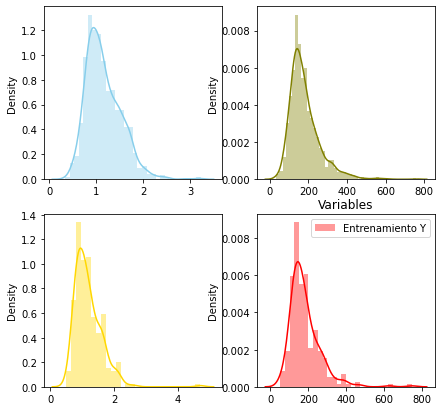

Iteracion: 100 , Error: 2472.982989948239
Iteracion: 200 , Error: 2088.2994852557376
Iteracion: 300 , Error: 2072.6621815884896
Iteracion: 400 , Error: 2071.2286177750775
Iteracion: 500 , Error: 2071.0407023654293
Iteracion: 600 , Error: 2071.01429643108
Iteracion: 700 , Error: 2071.0105469227506
Iteracion: 800 , Error: 2071.0100137141544
Iteracion: 900 , Error: 2071.009937871675
Iteracion: 1000 , Error: 2071.009927083671
Iteracion: 1100 , Error: 2071.0099255491546
Iteracion: 1200 , Error: 2071.009925330881
Iteracion: 1300 , Error: 2071.009925299833
Iteracion: 1400 , Error: 2071.0099252954165
Iteracion: 1500 , Error: 2071.009925294789
Iteracion: 1600 , Error: 2071.0099252946993
Iteracion: 1700 , Error: 2071.0099252946866
Iteracion: 1800 , Error: 2071.0099252946866
Iteracion: 1900 , Error: 2071.0099252946866
Iteracion: 2000 , Error: 2071.0099252946866
Iteracion: 2100 , Error: 2071.0099252946866
Iteracion: 2200 , Error: 2071.0099252946866
Iteracion: 2300 , Error: 2071.0099252946866
Itera

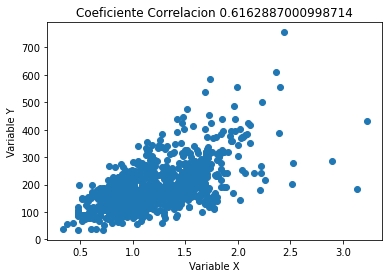

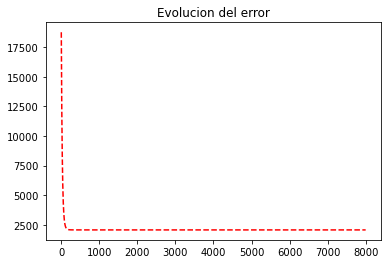

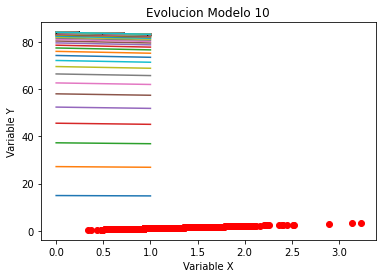

C:\ProgramData\Anaconda3\envs\proyectofinal\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


m = 84.15530571499971 intercepto = 83.27950879760316
w = [[129.95124229]], b = [30.32458517]
Mean squared error: 4585.54
Coefficient of determination: 0.32


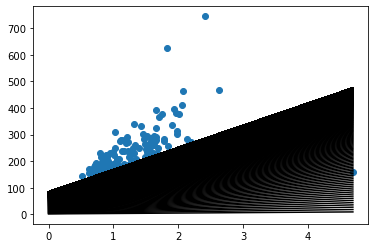

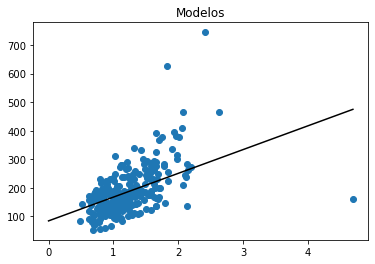

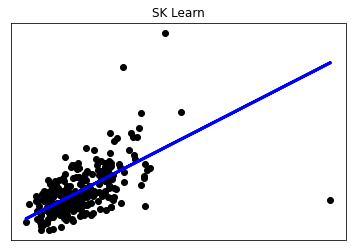

In [11]:
pryfinal = regresion_lineal(8000,100,0.009)
